# Concept  
### Full-adder  
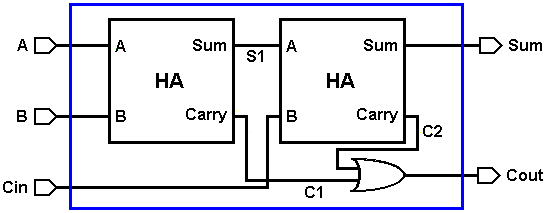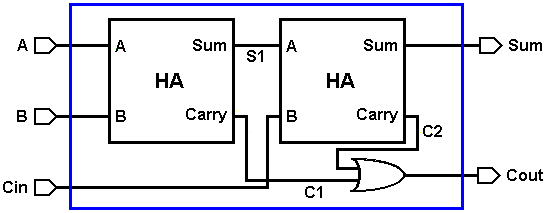



In [1]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
        
class LinkedList:
    def __init__(self):
        self.head = None
    
    def add(self, data):
        if self.head == None:
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)    

        return self
            
    def __str__(self):
        result = ""
        curr = self.head
        while curr != None:
            result = str(curr.data) + result
            curr = curr.next
        return result


In [2]:
def solve_ver1(a: LinkedList, b: LinkedList):
    result_node = LinkedList()
    
    def adder(a: Node, b: Node, carry: int, node: LinkedList):
        result = a.data + b.data + carry
        next_carry = result > 9 and 1 or 0
        adder(a.next, b.next, next_carry, result_node.add(result % 10))

    start(a.head, b.head, 0, result_node)
    return result_node


In [3]:
def solve(a: LinkedList, b: LinkedList):
    result_node = LinkedList()
    
    def adder(a: Node, b: Node, carry: int, node: LinkedList):
        def getCarry():
            a_data = a.data if a is not None else 0
            b_data = b.data if b is not None else 0
            return (a_data + b_data + carry > 9) and 1 or 0
        
        if a == None and b == None and carry == 0: 
            return result_node
        elif a == None and b == None and carry == 1: 
            return adder(a, b, 0, result_node.add(carry))
        elif a == None and b != None: 
            adder(a, b.next, getCarry(), result_node.add((b.data + carry) % 10))
        elif a != None and b == None: 
            adder(a.next, b, getCarry(), result_node.add((a.data + carry) % 10))
        else: 
            adder(a.next, b.next, getCarry() , result_node.add((a.data + b.data + carry) % 10))

            
    adder(a.head, b.head, 0, result_node)
    return result_node


In [4]:
import random
for i in range(10000):
    t_a = random.randint(1, 10000)
    t_b = random.randint(1, 10000)
    t_answer = t_a + t_b
    
    c_a = LinkedList()
    for ch in reversed(str(t_a)):
        c_a.add(int(ch))
        
    c_b = LinkedList()
    for ch in reversed(str(t_b)):
        c_b.add(int(ch))
    
    c_answer = str(solve(c_a, c_b))
    if int(c_answer) != int(t_answer): # if wrong
        print("[Expected] %d + %d = %d" % (t_a, t_b, t_answer))
        print("[Result  ] %s + %s = %s" % (c_a, c_b, c_answer))
    